DECISION TREES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, _tree
from prune import prune_tree

In [3]:
df = pd.read_csv("../data/spambase_augmented.csv") 

X and y

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   

In [ ]:
print(df.shape)
print(X.shape)
print(y.shape)

NameError: name 'df' is not defined

criterion = gini

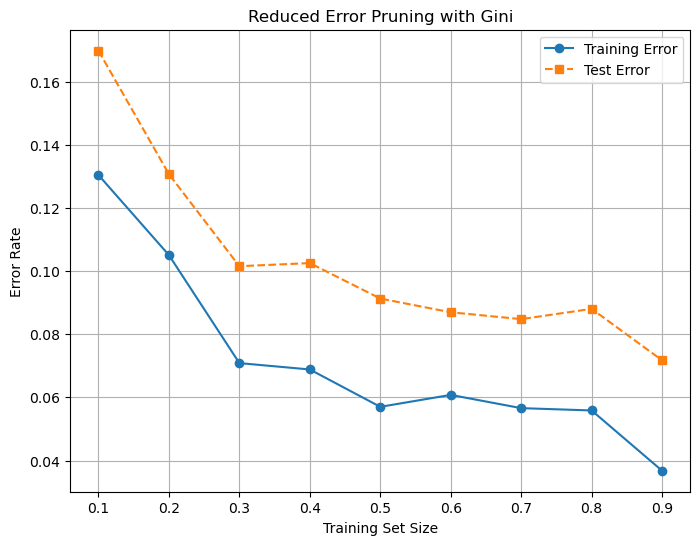

In [6]:

train_sizes = np.linspace(0.1, 0.9, 9)  # Train sizes from 10% to 90%
g_train_error = []
g_test_error = []

# Vary training size
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Further split training set for validation (10% of train size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    clf = DecisionTreeClassifier(criterion='gini',random_state=42)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    g_train_error.append(cur_training_err)
    g_test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, g_train_error, label="Training Error", marker='o', linestyle='-')
plt.plot(train_sizes, g_test_error, label="Test Error ", marker='s', linestyle='--')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")    
plt.title("Reduced Error Pruning with Gini")
plt.legend()
plt.grid(True)
plt.show()

criterion = entropy

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 
print(df.shape)
print(X.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


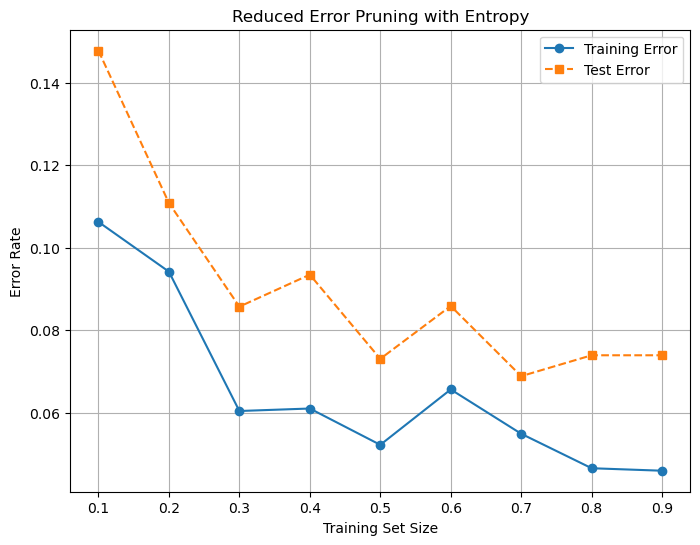

In [8]:
train_sizes = np.linspace(0.1, 0.9, 9)  # Train sizes from 10% to 90%
e_train_error = []
e_test_error = []

# Vary training size
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)

    # Further split training set for validation (10% of train size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

    clf = DecisionTreeClassifier(criterion='entropy',random_state=42)
    clf.fit(X_train, y_train)

    # Apply pruning
    prune_tree(clf, X_val, y_val)

    # Compute train error
    y_train_pred = clf.predict(X_train)
    cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

    # Compute test error
    y_test_pred = clf.predict(X_test)
    cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

    e_train_error.append(cur_training_err)
    e_test_error.append(cur_test_error)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(train_sizes, e_train_error, label="Training Error", marker='o', linestyle='-')
plt.plot(train_sizes, e_test_error, label="Test Error ", marker='s', linestyle='--')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Reduced Error Pruning with Entropy")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print('gini train error : ', g_train_error)
print('entropy train error : ', e_train_error)
print('gini test error : ' , g_test_error)
print('entropy test error : ' , e_test_error)

gini train error :  [0.13043478260869568, 0.10507246376811596, 0.07085346215780997, 0.0688405797101449, 0.05700483091787445, 0.06078904991948475, 0.0565907522429262, 0.055857487922705285, 0.03676865271068175]
entropy train error :  [0.106280193236715, 0.09420289855072461, 0.06038647342995174, 0.06099033816425126, 0.05217391304347829, 0.0656199677938808, 0.054865424430641796, 0.046497584541062786, 0.04589371980676327]
gini test error :  [0.1698067632850242, 0.13070652173913044, 0.10155279503105585, 0.10253623188405792, 0.09130434782608698, 0.08695652173913049, 0.08478260869565213, 0.08804347826086956, 0.07173913043478264]
entropy test error :  [0.14782608695652177, 0.11086956521739133, 0.08571428571428574, 0.09347826086956523, 0.07304347826086954, 0.08586956521739131, 0.0688405797101449, 0.07391304347826089, 0.07391304347826089]
